# Fetching and Cleaning HTML Text

### NLP 2017 - HW1

### Asi Messica and Eran Barash

1. Data exploration
1.1 Manual tagging


In [16]:
sentence1 = "One of the most basic and most useful task when processing text is to tokenize each word separately and label each word according to its most likely part of speech."
sentence1_manual_tagging = "One/DET of/ADP the/DET most/ basic/ and/ most/ useful/ task/NOUN when/ processing/VERB text/NOUN is/ to/ tokenize/VERB each/ word/NOUN seaperately/ and/ label/VERB each/ word/NOUN according/ to/ its/ most/ likely/ part/ of/ speech/ "

In [20]:
sentence1_manual_tagging =nltk.pos_tag(nltk.word_tokenize(sentence1))

In [21]:
print(sentence1_manual_tagging)

[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('basic', 'JJ'), ('and', 'CC'), ('most', 'JJS'), ('useful', 'JJ'), ('task', 'NN'), ('when', 'WRB'), ('processing', 'VBG'), ('text', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('tokenize', 'VB'), ('each', 'DT'), ('word', 'NN'), ('separately', 'RB'), ('and', 'CC'), ('label', 'VB'), ('each', 'DT'), ('word', 'NN'), ('according', 'VBG'), ('to', 'TO'), ('its', 'PRP$'), ('most', 'RBS'), ('likely', 'JJ'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('.', '.')]


1.2 Gathering and Cleaning Up Data

In [1]:
import google3
import justext
import requests
import re
import nltk

search = "nobel prize"
filename = "cleanTxt"
links = google3.getGoogleResults(search)
i=0
cutOff = 20
max = 10
for url in links:
    if (i<max):
            try:
                print(url)
                html = requests.get(url).text
            except:
                print("error") 
            html = re.sub("[\r\n]+", "\n", html)
            html = re.sub("[\n]+", "\n", html)
            html = re.sub("[\t, ]+"," ", html)
            html = re.sub("[\t, ]+","``", html)
            raw = google3.cleanHtml(html)
            if (raw != ''):
                pfileName = filename + str(i) + ".txt"
                print("raw "+str(i)+raw+"\n")
                google3.PrintFile(raw,pfileName)
                i+=1



https://en.wikipedia.org/wiki/Nobel_Prize
https://www.facebook.com/nobelprize/
https://www.youtube.com/user/thenobelprize
https://en.wikipedia.org/wiki/Nobel_Prize
https://www.nobelprize.org/
http://www.businessinsider.com/who-will-win-nobel-prize-in-physics-for-gravitational-waves-2016-2
https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics
http://iaskracker.com/5-things-to-know-about-the-nobel-prize/
http://www.bbc.com/news/world-europe-38280402
https://sweden.se/society/the-nobel-prize-awarding-great-minds/
http://www.nytimes.com/topic/subject/nobel-prizes
http://indianexpress.com/article/world/nobel-prize-2016-bob-dylan-juan-manuel-santos-here-is-the-list-of-winners-and-their-work-4420869/
http://www.independent.co.uk/arts-entertainment/music/news/bob-dylan-nobel-prize-acceptance-speech-read-a7468096.html


In [4]:
#read and tag 20 senteces from one file   

pfileName = ".//Data//"+filename+ "0" + ".txt"
with open(pfileName) as f:
    for line in f:
        print(line)
        tokens = nltk.word_tokenize(line)
        print(tokens)
        tagging = nltk.pos_tag(tokens,tagset='universal')
        print(tagging)
        
        

#print(text)

NameError: name 'filename' is not defined

1.3 Gathering Basic Statistics

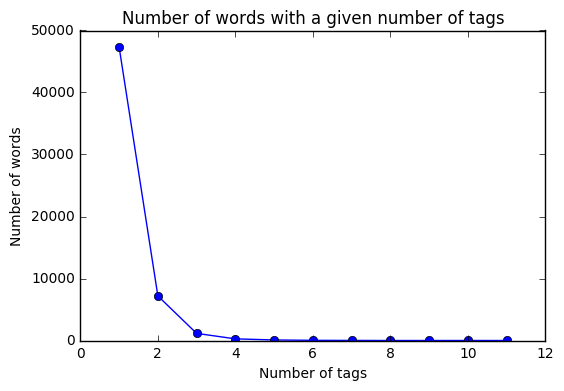

In [17]:
import nltk
from nltk.corpus import brown
import pylab

cfd = nltk.ConditionalFreqDist(brown.tagged_words())
size2words = nltk.Index((len(tags), word) for (word, tags) in cfd.items())
sizes = pylab.arange(1, 12)

pylab.plot(sizes, [len(size2words[size]) for size in sizes], '-bo')
pylab.title('Number of words with a given number of tags')
pylab.xlabel('Number of tags')
pylab.ylabel('Number of words')
pylab.show()

2. Stratified Test/Train Sets
'train' and 'test' are dictionaries of category: tagged_sents. This was done inorder to simplify follwing tasks. 

In [76]:
import nltk
from functools import reduce
from nltk.corpus import brown 

def category_split(sents, ratio):
    size = int(len(sents) * ratio)
    return sents[:size], sents[size:]

def stratified_split(corpus, ratio=0.9):
    train = {}
    test = {}
    for cat in corpus.categories():
        cat_train_test = category_split(corpus.tagged_sents(categories=cat), ratio)
        train[cat] = cat_train_test[0]
        test[cat] = cat_train_test[1]
    return train, test

In [104]:
train, test = stratified_split(brown)

3. Unigram

3.1.1 Class SimpleUnigramTagger

In [80]:
import nltk
from collections import defaultdict
class SimpleUnigramTagger(nltk.TaggerI):
    def __init__(self, train):
        self._train(train)
        
    def _train(self, tagged_corpus):
        tagged_words = [tagged_word for sent in tagged_corpus for tagged_word in sent]
        cfd = nltk.ConditionalFreqDist(tagged_words)
        self._likely_tags = defaultdict(lambda: 'NONE')
        for word in cfd:
            self._likely_tags[word] = cfd[word].max()
        
    def tag(self, tokens):
        return [(word, self._likely_tags[word]) for word in tokens]


3.1.2 SimpleUnigramTagger and nltk.UnigramTagger evalution comparison

In [105]:
from nltk.corpus import brown
clean_train = [sent for sents in train.values() for sent in sents]
clean_test = [sent for sents in test.values() for sent in sents]
tagger = SimpleUnigramTagger(train=clean_train)
nltk_tagger = nltk.UnigramTagger(train=clean_train)

print("SimpleUnigramTagger evaluation: \n{0}\n".format(tagger.evaluate(clean_test)))
print("nltk.UnigramTagger evaluation: \n{0}".format(nltk_tagger.evaluate(clean_test)))

SimpleUnigramTagger evaluation: 
0.8817004462080685

nltk.UnigramTagger evaluation: 
0.8817004462080685


3.1.3 Known and unknown words

In [137]:
def remove_tags(sent):
    return [word for (word, _) in sent]
tagged_test = [tagger.tag(remove_tags(sent)) for sent in clean_test]
test_size = sum([1 for sent in clean_test for word in sent])
unk_num = sum([1 for sent in tagged_test for (_, tag) in sent if tag == "NONE"])
known_num = 0
for i in range(len(clean_test)):
    for j in range(len(clean_test[i])):
        if (tagged_test[i][j][1] != "NONE") and (tagged_test[i][j][1] != clean_test[i][j][1]):
            known_num += 1
print("Error due to unknown words: {0}.".format(unk_num/test_size))
print("Error due to known words: {0}.".format(known_num/test_size))

Error due to unknown words: 0.040594051117194496.
Error due to known words: 0.07770550267473691.


3.1.4 Rate of unknown words per category

In [103]:
for cat in test.keys():
    tagged_words = tagger.tag([word for sent in test[cat] for (word, _) in sent])
    print("{0}: {1} unkown words.".format(cat, sum([1 for (_, tag) in tagged_words if tag == "NONE"])))

mystery: 146 unkown words.
lore: 393 unkown words.
adventure: 364 unkown words.
belles_lettres: 793 unkown words.
religion: 70 unkown words.
reviews: 219 unkown words.
hobbies: 435 unkown words.
news: 392 unkown words.
government: 233 unkown words.
science_fiction: 26 unkown words.
romance: 191 unkown words.
learned: 943 unkown words.
humor: 172 unkown words.
editorial: 244 unkown words.
fiction: 228 unkown words.
